# Capstone Project - The battle of Neighborhood

## Introduction
New York's demographics show that it is a large and ethnically diverse metropolis. It is the largest city in the United States with a long history of international immigration. New York City was home to nearly 8.5 million people in 2014, accounting for over 40% of the population of New York State and a slightly lower percentage of the New York metropolitan area, home to approximately 23.6 million. Over the last decade the city has been growing faster than the region. The New York region continues to be by far the leading metropolitan gateway for legal immigrants admitted into the United States.

Throughout its history, New York City has been a major point of entry for immigrants; the term "melting pot" was coined to describe densely populated immigrant neighborhoods on the Lower East Side. As many as 800 languages are spoken in New York, making it the most linguistically diverse city in the world. English remains the most widely spoken language, although there are areas in the outer boroughs in which up to 25% of people speak English as an alternate language, and/or have limited or no English language fluency. English is least spoken in neighborhoods such as Flushing, Sunset Park, and Corona.

With the diversity in their culture , New York have diverse cuisines. There are many resturants in New york City beloning to different cuisines like Chinese , Vietnamese , French etc.

In the project , I will list and visualize info about great Vietnamese resturants in New York.

## Data
For this project we need the following data :

* New York City data that contains list Boroughs, Neighborhoods along with their latitude and longitude.
    *  Data source : https://cocl.us/new_york_dataset
    *  Description : This data set contains the required information. The data is used to explore various neighborhoods of NYC.
* Vietnamese resturants in each neighborhood in NYC.
    *  Data source : Fousquare API
    *  Description : All the venues is archieved in each neighborhood by using the API. Venues are selected to obtain only Vietnamese resturants info.

## Approach
* Collect the new york city data from https://cocl.us/new_york_dataset
* Using FourSquare API we will find all venues for each neighborhood.
* Filter out all venues which are Vietnamese Resturants.
* Find rating , tips and likes for each Vietnamese Resturants using FourSquare API.
* Using rating for each resturant , we will sort that data.
* Visualize the Ranking of neighborhoods using folium library(python)

## Questions that can be asked using the above mentioned datasets
* What is best location in New York City for Vietnamese Cuisine ?
* Which areas have potential good Vietnamese Resturants?
* Which is the best Vietnamese Resturant in NYC ?
* Which is the best place to stay if you prefer Vietnamese Cuisine ?




## Analysis
We will import the required libraries for python.

* pandas and numpy for handling data.
* request module for using FourSquare API.
* geopy to get co-ordinates of City of New York.
* folium to visualize the results on a map

In [1]:
import os # Operating System
import numpy as np
import pandas as pd
import datetime as dt # Datetime
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 

import requests # library to handle requests
from pandas.io.json import json_normalize 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge folium=0.5.0 --yes
import folium 
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.0.1               |             py_0         575 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         673 KB

The following NEW packages will be INSTALLED:

    altair:  4.0.1-py_0 conda-forge
    branca:  0.4.0-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge


alta

In [2]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [13]:
def get_venues(lat,lng): 
    radius=1000
    LIMIT=100

    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [4]:
def get_venue_details(venue_id):
            
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [5]:
url='https://cocl.us/new_york_dataset'
resp=requests.get(url).json()
features=resp['features']
ny_df = pd.DataFrame(columns= ['Borough', 'Neighborhood', 'Latitude', 'Longitude'])
for data in features:
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    ny_df = ny_df.append({'Borough': borough,
                          'Neighborhood': neighborhood_name,
                          'Latitude': neighborhood_lat,
                          'Longitude': neighborhood_lon}, ignore_index=True)
ny_df.head()    

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [6]:
ny_df.shape

(306, 4)

In [7]:
CLIENT_ID = 'CL4Y22Y1KYPVTHJLQKDSCWYEHT24NM3ZRDOC0NX4PP2C2G0M' # your Foursquare ID
CLIENT_SECRET = 'FDYKJ0Y012XNB4FN0NIDR2MXFOWBS2PZTKC1HKTN14ME5NR4' # your Foursquare Secret

VERSION = '20180604'

In [14]:
vn_res_ny = pd.DataFrame(columns=['Borough','Neighborhood','ID','Name'])
count=1
for row in ny_df.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    vietnamese_restaurants=venues[venues['Category']=='Vietnamese Restaurant']   
    for restaurant_detail in vietnamese_restaurants.values.tolist():
        id, name , category=restaurant_detail
        vn_res_ny = vn_res_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1
vn_res_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Fordham,4aee2a4bf964a520a2d221e3,Cơm Tấm Ninh Kiều
1,Brooklyn,Bay Ridge,4af861e3f964a520bc0c22e3,Pho Hoai Bay Ridge
2,Brooklyn,Bensonhurst,5a5aaf7cc8b2fb7e920360f0,Em Vietnamese Restaurant
3,Brooklyn,Bensonhurst,55b7b8ba498e29e52cfc5658,Pho 18 Ave
4,Brooklyn,Sunset Park,49e4cedbf964a5204f631fe3,Ba Xuyên


In [15]:
vn_res_ny.shape

(62, 4)

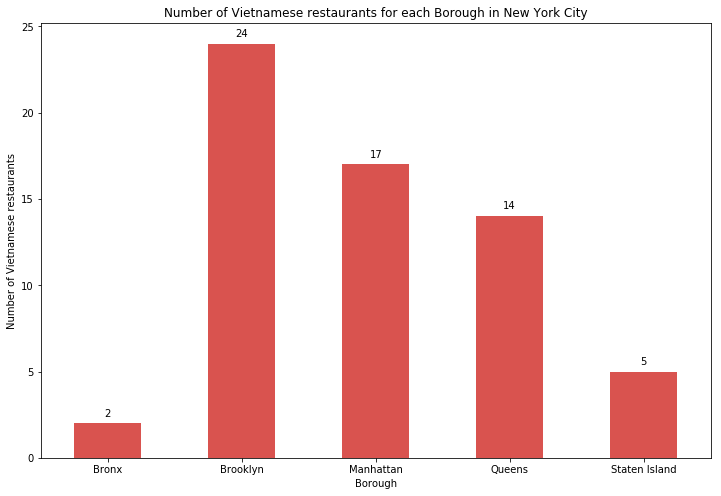

In [17]:
import matplotlib.pyplot as plt
f1 = vn_res_ny.groupby(['Borough']).size()
ax = f1.plot(kind='bar', figsize=(12, 8), rot=0, color = ['#d9534f'])

ax.set_ylabel('Number of Vietnamese restaurants') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('Number of Vietnamese restaurants for each Borough in New York City') 

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 10
               )

plt.show()

From the figure above, we can see that Brooklyn has the largest number of Vietnames restaurants.

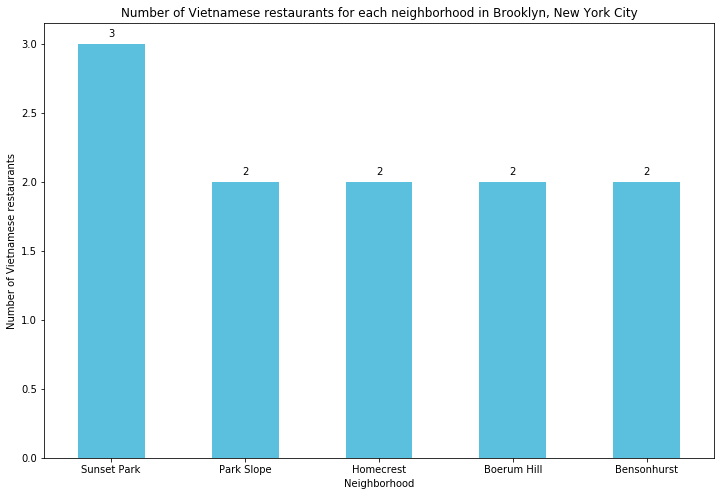

In [18]:
f2 = vn_res_ny[vn_res_ny['Borough']=='Brooklyn'].groupby(['Neighborhood']).size().nlargest(5)
f2.sort_values(ascending = False, inplace = True, axis = 0)

ax = f2.plot(kind='bar', figsize=(12, 8), rot=0, color = ['#5bc0de'])

ax.set_ylabel('Number of Vietnamese restaurants') # add to x-label to the plot
ax.set_xlabel('Neighborhood') # add y-label to the plot
ax.set_title('Number of Vietnamese restaurants for each neighborhood in Brooklyn, New York City') 

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 10
               )

plt.show()



In Brooklyn, Sunset Park neighborhood has the largest amount of restaurants.

Now we will get the rating of each restaurant for further analysis.

In [19]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
vn_res_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in vn_res_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    vn_res_stats_ny = vn_res_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1


In [20]:
vn_res_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Fordham,4aee2a4bf964a520a2d221e3,Cơm Tấm Ninh Kiều,52,7.8,34
1,Brooklyn,Bay Ridge,4af861e3f964a520bc0c22e3,Pho Hoai Bay Ridge,36,7.3,27
2,Brooklyn,Bensonhurst,5a5aaf7cc8b2fb7e920360f0,Em Vietnamese Restaurant,18,7.7,10
3,Brooklyn,Bensonhurst,55b7b8ba498e29e52cfc5658,Pho 18 Ave,8,5.6,3
4,Brooklyn,Sunset Park,49e4cedbf964a5204f631fe3,Ba Xuyên,155,9.0,74


Because of the limitation of premium calls per day, we convert the data to csv file for a backup plan.

In [21]:
vn_res_stats_ny.to_csv('vn_res_rating.csv',index = False)

In [22]:
vn_res_rate=pd.read_csv('vn_res_rating.csv')

In [23]:
vn_res_rate = vn_res_rate.drop_duplicates('ID')
vn_res_rate 

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Fordham,4aee2a4bf964a520a2d221e3,Cơm Tấm Ninh Kiều,52,7.8,34
1,Brooklyn,Bay Ridge,4af861e3f964a520bc0c22e3,Pho Hoai Bay Ridge,36,7.3,27
2,Brooklyn,Bensonhurst,5a5aaf7cc8b2fb7e920360f0,Em Vietnamese Restaurant,18,7.7,10
3,Brooklyn,Bensonhurst,55b7b8ba498e29e52cfc5658,Pho 18 Ave,8,5.6,3
4,Brooklyn,Sunset Park,49e4cedbf964a5204f631fe3,Ba Xuyên,155,9.0,74
5,Brooklyn,Sunset Park,4aaea05bf964a520aa6220e3,Thanh Da,58,7.8,29
6,Brooklyn,Sunset Park,50dbb09be4b0e320417d97cf,Pho Viet,8,6.6,7
7,Brooklyn,Greenpoint,5aa427100a464d2cf717b688,Đi ăn Đi,178,9.0,39
8,Brooklyn,Windsor Terrace,4a8f3caaf964a5207c1420e3,Henry's,30,8.1,21
9,Brooklyn,Prospect Heights,559e9f0c498e113f384a2cc1,Banh Mi Place,103,8.0,35


In [24]:
vn_res_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 60
Data columns (total 7 columns):
Borough         45 non-null object
Neighborhood    45 non-null object
ID              45 non-null object
Name            45 non-null object
Likes           45 non-null int64
Rating          45 non-null float64
Tips            45 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 2.8+ KB


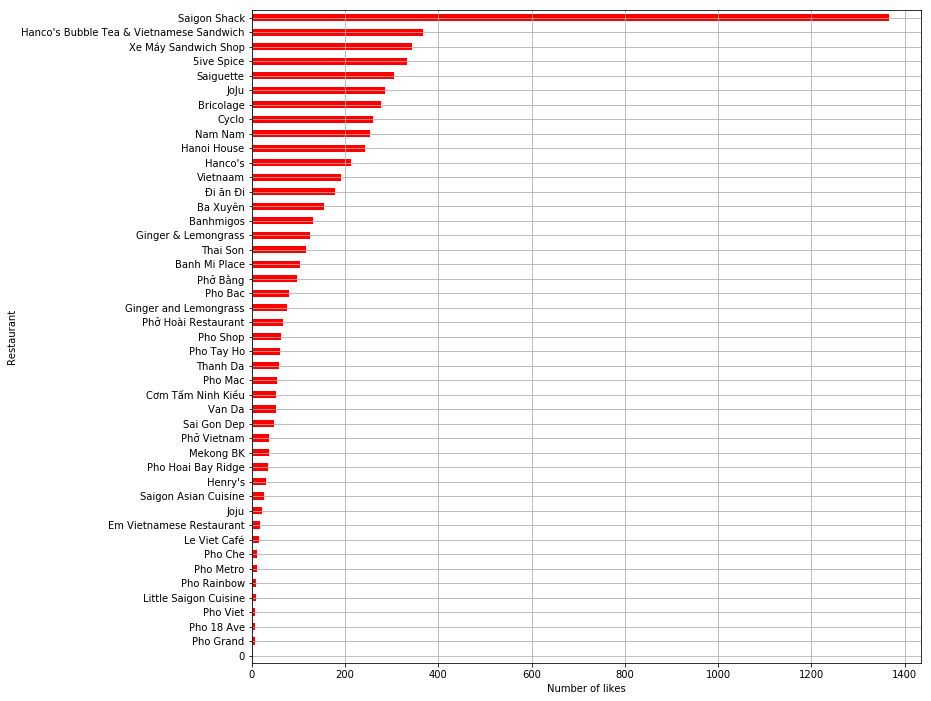

In [25]:
vn_res_rate.set_index('Name')['Likes'].sort_values().plot(kind='barh', grid=True,color = 'red', figsize=(12,12))
plt.xlabel('Number of likes')
plt.ylabel('Restaurant')
plt.show()

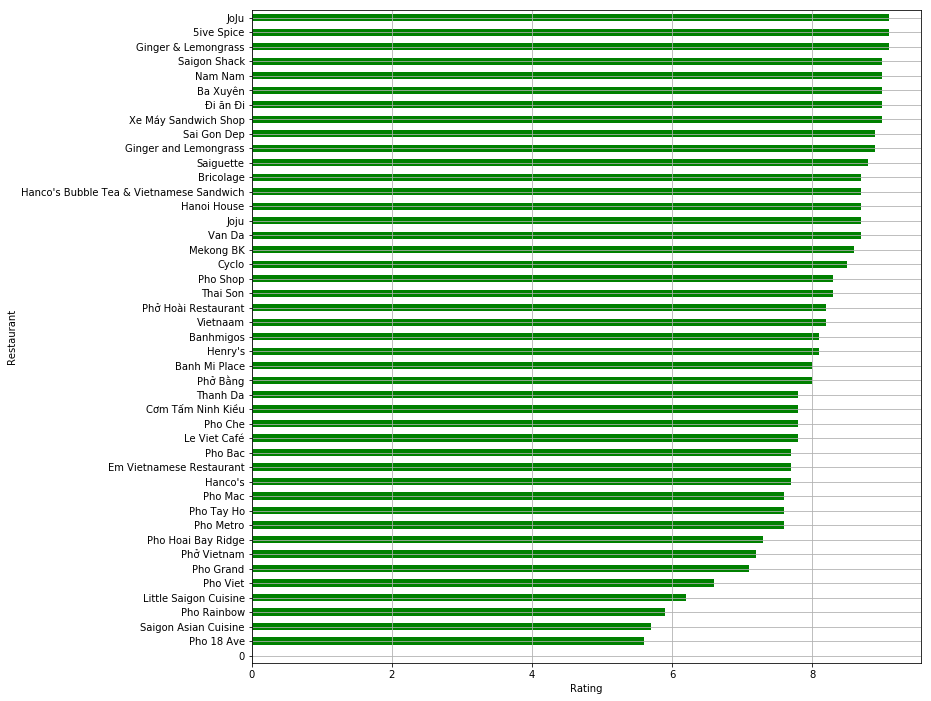

In [26]:
vn_res_rate.set_index('Name')['Rating'].sort_values().plot(kind='barh', grid=True,color = 'green', figsize=(12,12))
plt.xlabel('Rating')
plt.ylabel('Restaurant')
plt.show()

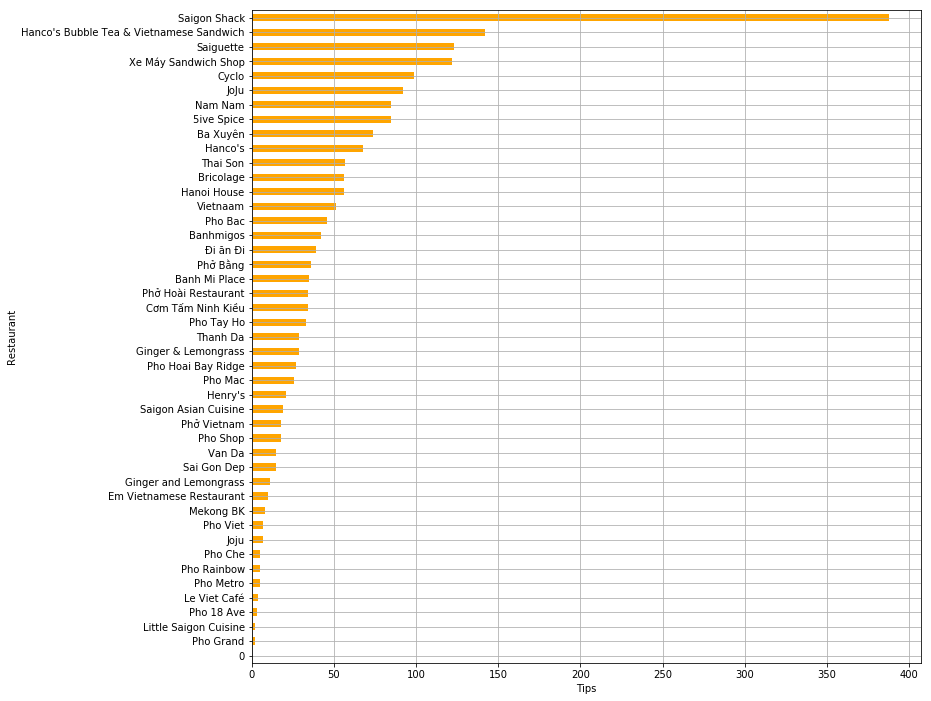

In [27]:
vn_res_rate.set_index('Name')['Tips'].sort_values().plot(kind='barh', grid=True,color = 'orange', figsize=(12,12))
plt.xlabel('Tips')
plt.ylabel('Restaurant')
plt.show()

In [28]:
neigh_rate = vn_res_rate.groupby('Neighborhood',as_index=False).mean() [['Neighborhood','Rating']]
neigh_rate.sort_values(['Rating'],ascending = False, inplace = True, axis = 0)
neigh_rate.rename(columns={'Rating':'Average Rating'},inplace=True)
neigh_rate.head()

,Neighborhood,Average Rating
23,Lower East Side,9.1
6,Boerum Hill,9.1
19,Greenwich Village,9.0
11,East Williamsburg,9.0
18,Greenpoint,9.0


In [29]:
neigh_rate=neigh_rate[neigh_rate['Average Rating']>=8.0]

In [30]:
neigh_rate

,Neighborhood,Average Rating
23,Lower East Side,9.10
6,Boerum Hill,9.10
19,Greenwich Village,9.00
11,East Williamsburg,9.00
18,Greenpoint,9.00
4,Beechhurst,8.90
26,Murray Hill,8.90
24,Manhattan Valley,8.80
10,East Village,8.80
9,Downtown,8.70


We merge the data with orginal new york data to obtain their longitude and latitude.

In [ ]:
neigh_rate=pd.merge(neigh_rate,ny_df, on='Neighborhood')
neigh_rate

In [ ]:
neigh_rate=neigh_rate[['Borough','Neighborhood','Average Rating','Latitude','Longitude']]
neigh_rate

Generate New York map and display locations

In [ ]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)

In [ ]:
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in neigh_rate[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [ ]:
neigh_rate['Label']=neigh_rate['Neighborhood']+', '+neigh_rate['Borough']+' ('+neigh_rate['Average Rating'].map(str)+')'

In [ ]:
for lat, lng, label in neigh_rate[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)

## Conclusion

* Noho(Manhattan), Greenpoint(Brooklyn), Greenwich Village(Manhattan) are some of the best neighborhoods for Vietnamese cuisine.
* Brooklyn have good potential Vietnamese restaurants.
* Manhattan is the best place to stay if you prefer Vietnamese Cuisine.
* 5iveSpice ranks frist in rating of Vietnamese Resturants in NYC.

## Limitations

* The ranking is purely on basis of rating of resturants.
* The accuracy of data depends purely depends on the data provided by FourSquare.